Линейная регрессия, предсказывающая значение sin(y)

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

Для обучающей выборки берем 100 точек из равномерного распределения.

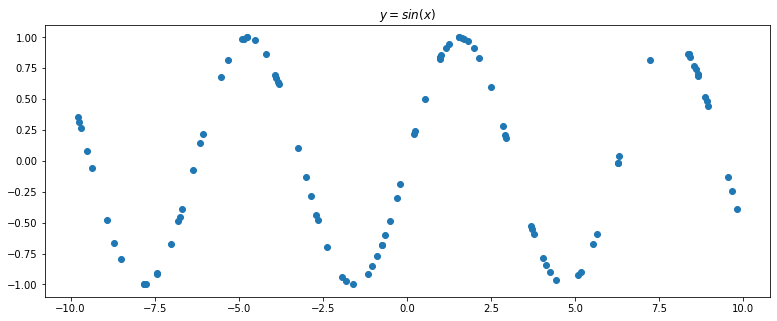

In [ ]:
x_train = torch.rand(100) #точки от 0 до 1
x_train = x_train * 20 - 10 # точки от -10 до 10

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

Добавим шум (из нормального распределения Гаусса):

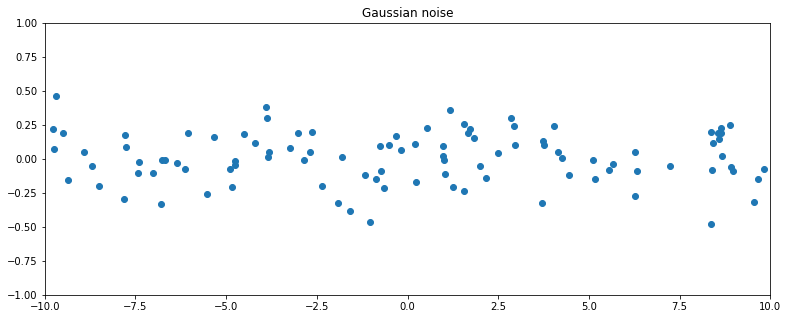

In [ ]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

Прибавим шум к функции:

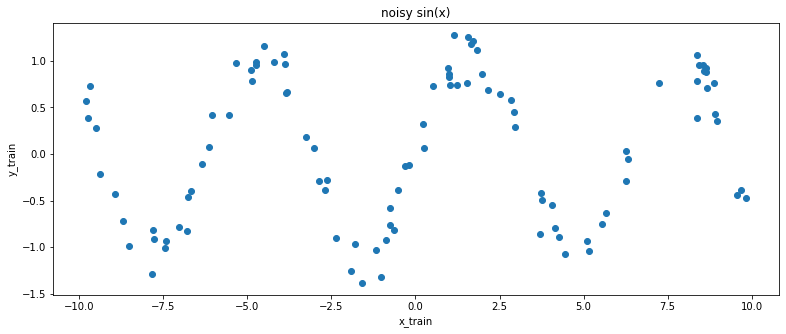

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

Для общности данных нужно вектор х превратить в столбец:

In [ ]:
#метод unsqueeze_ - превращает строку в столбец, нижнее подчеркивание означает трасформацию объекта к которому применяется метод
#он добавлет тензору еще 1 размерность
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

Проверка:

In [ ]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

Нужен для подбора гиперпараметров(архитектура, loss-функция, метод градиентного спуска, learning rate, количество эпох в обучении и прочее)

Также нужен для того, чтобы посмотреть как сеть ведет себя на данных, которых не было в обучении

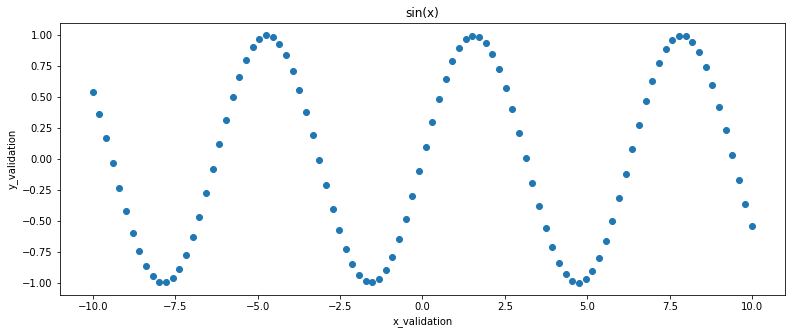

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

Создаем нейросеть. Для этого создаем класс SineNet и наследуем его от torch.nn.Module. Наследование внесет дополнительные функции.

In [ ]:
class SineNet(torch.nn.Module):
  #Функция _init_ , n_hidden_neurons - количество скрытых нейронов в каждом слое, то есть предполагам что все слои одинаковые по количеству нейронов
    # super(SineNet, self).__init__() инициализирует родительский объект
    # self.fc1 - первый слой(fully connected, то есть линия), на вход передаем кол-во входных(1 - координата х) и выходных нейронов(n_hidden_neurons)
    # self.act1 - функция активации(берем сигмоиду)
    # self.fc1 - еще один полносвязный слой, но с 1 нейроном (будет ответом на вопрос какой y)
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

       #Функция того как слои будут последовательно меняться
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

# Prediction

Посмотрим, как метод .forward работает до обучения

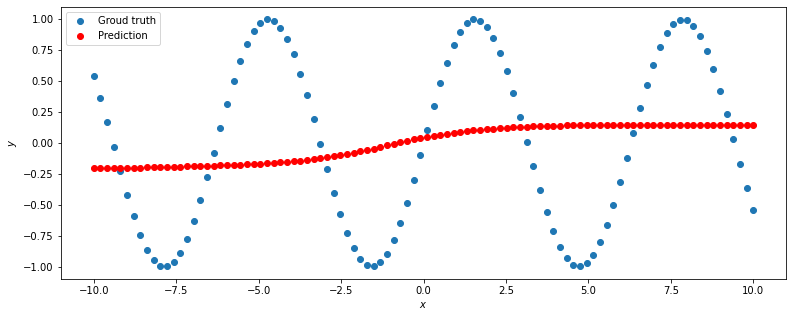

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Exersize: 
1) Добавим еще один fc-слой

2) Заменим активацию между слоями на гиперболический тангенс

In [ ]:
# import torch
# class SineNet(torch.nn.Module):
#     def __init__(self, n_hidden_neurons):
#         super(SineNet, self).__init__()
#         self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
#         self.act1 = torch.nn.Tanh()
#         self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.act2 = torch.nn.Tanh()
#         self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.act1(x)
#         x = self.fc2(x)
#         x = self.act2(x)
#         x = self.fc3(x)
#         return x

# sine_net = SineNet(int(input()))
# sine_net.forward(torch.Tensor([1.]))

# print(sine_net)

# Optimizer

Совершает шаги градиентного спуска

In [109]:
# SGD здесь работает не очень, используем  Adam(На вход параметры которые хотим модифицировать - веса нейронной сети)
# метод .parameters() из наследованного класса
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

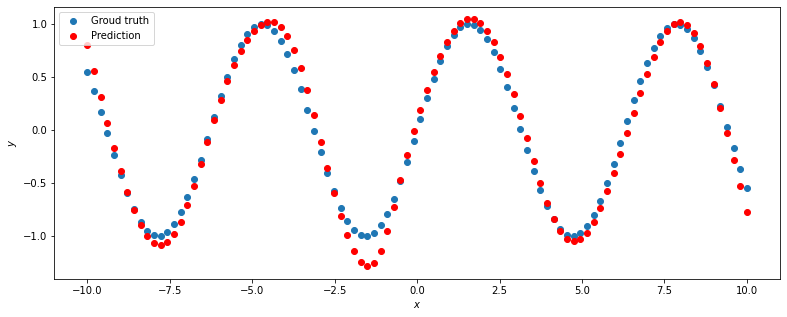

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)